# MODEL TRAINING

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [19]:
df = pd.read_csv(r'C:\Users\justi\OneDrive\STUDY\Python\MLProject1\Data\StudentsPerformance.csv')

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
df['Total_Score'] = df['math score'] + df['reading score'] + df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [22]:
df.drop(['math score', 'reading score', 'writing score'], axis=1,inplace=True)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Total_Score
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229


In [23]:
X = df.drop(['Total_Score'], axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [24]:
y=df['Total_Score']
y.head()

0    218
1    247
2    278
3    148
4    229
Name: Total_Score, dtype: int64

In [25]:
# Create column transformer with 3 types of transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

#combining encoding and scaling into a pipeline using ColumnTransformer module in sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transform = StandardScaler()
oh_transform = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transform, cat_features),
        ("StandardScaler", numeric_transform, num_features)
    ]
)

In [26]:
#Calling the preprocessor on the data

X = preprocessor.fit_transform(X)


In [29]:
print(X)

  (0, 0)	1.0
  (0, 3)	1.0
  (0, 8)	1.0
  (0, 14)	1.0
  (0, 16)	1.0
  (1, 0)	1.0
  (1, 4)	1.0
  (1, 11)	1.0
  (1, 14)	1.0
  (1, 15)	1.0
  (2, 0)	1.0
  (2, 3)	1.0
  (2, 10)	1.0
  (2, 14)	1.0
  (2, 16)	1.0
  (3, 1)	1.0
  (3, 2)	1.0
  (3, 7)	1.0
  (3, 13)	1.0
  (3, 16)	1.0
  (4, 1)	1.0
  (4, 4)	1.0
  (4, 11)	1.0
  (4, 14)	1.0
  (4, 16)	1.0
  :	:
  (995, 0)	1.0
  (995, 6)	1.0
  (995, 10)	1.0
  (995, 14)	1.0
  (995, 15)	1.0
  (996, 1)	1.0
  (996, 4)	1.0
  (996, 9)	1.0
  (996, 13)	1.0
  (996, 16)	1.0
  (997, 0)	1.0
  (997, 4)	1.0
  (997, 9)	1.0
  (997, 13)	1.0
  (997, 15)	1.0
  (998, 0)	1.0
  (998, 5)	1.0
  (998, 11)	1.0
  (998, 14)	1.0
  (998, 15)	1.0
  (999, 0)	1.0
  (999, 5)	1.0
  (999, 11)	1.0
  (999, 13)	1.0
  (999, 16)	1.0


In [30]:
X.shape

(1000, 17)

In [32]:
# Splitting the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape , X_test.shape

((800, 17), (200, 17))

Create an evaluation function to give all metrics 

In [35]:
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2_square = r2_score(actual, predicted)
    return mae, mape, rmse, r2_square

In [36]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso':Lasso(),
    'Ridge': Ridge(),
    'k-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoosting Regressor': CatBoostRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}



In [41]:
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) #Training the model

    #Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate Train and Test dataset
    model_train_mae, model_train_mape, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mape, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("___________________")
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print(f'Root Mean Squared Error: {model_train_rmse}')
    print(f'Mean Absolute Error: {model_train_mae}')
    print(f'Mean Absolute Percentage Error: {model_train_mape}')
    print(f'R Squared value: {model_train_r2}')


    print('----------------------------------------------')

    print('Model performance for Test Set')
    print(f'Root Mean Squared Error: {model_test_rmse}')
    print(f'Mean Absolute Error: {model_test_mae}')
    print(f'Mean Absolute percentage Error: {model_test_mape}')
    print(f'R Squared value: {model_test_r2}')
    r2_list.append(model_test_r2)    

    print('='*35)
    print('\n')

Linear Regression
___________________
Model performance for training set
Root Mean Squared Error: 36.58697853356886
Mean Absolute Error: 29.80844437566925
Mean Absolute Percentage Error: 0.16175710068058785
R Squared value: 0.25427661135917523
----------------------------------------------
Model performance for Test Set
Root Mean Squared Error: 40.20474169562547
Mean Absolute Error: 31.47054816272972
Mean Absolute percentage Error: 0.20993799558119658
R Squared value: 0.16217176755435925


Lasso
___________________
Model performance for training set
Root Mean Squared Error: 37.307894460591754
Mean Absolute Error: 30.113390212012096
Mean Absolute Percentage Error: 0.16468560188262205
R Squared value: 0.2245993650861463
----------------------------------------------
Model performance for Test Set
Root Mean Squared Error: 41.15260813927915
Mean Absolute Error: 32.255294294300796
Mean Absolute percentage Error: 0.21725791263211533
R Squared value: 0.12220082585169667


Ridge
______________

# Results

In [43]:
print(list(zip(model_list, r2_list)))

[('Linear Regression', 0.16217176755435925), ('Lasso', 0.12220082585169667), ('Ridge', 0.1619464331695436), ('k-Neighbors Regressor', -0.013790655891561698), ('Decision Tree Regressor', -0.07476548618209167), ('Random Forest Regressor', -0.030868780036333643), ('XGBRegressor', -0.07047318728581198), ('CatBoosting Regressor', -0.044386165972209124), ('AdaBoost Regressor', 0.10656763998877428)]


In [42]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.162172
2,Ridge,0.161946
1,Lasso,0.122201
8,AdaBoost Regressor,0.106568
3,k-Neighbors Regressor,-0.013791
5,Random Forest Regressor,-0.030869
7,CatBoosting Regressor,-0.044386
6,XGBRegressor,-0.070473
4,Decision Tree Regressor,-0.074765


In [44]:
# Linear regression had the best result in terms of R2_Score

lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 16.22


Text(0, 0.5, 'Predicted')

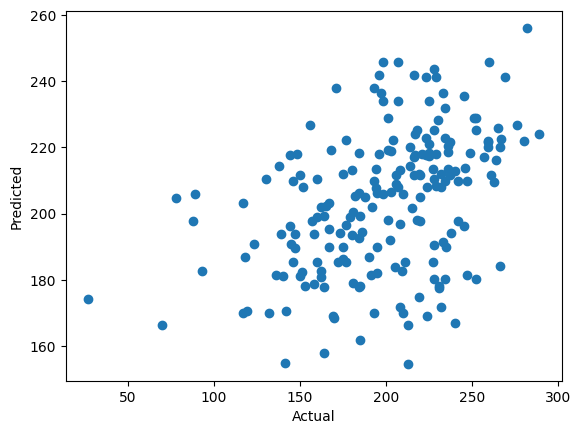

In [45]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Total_Score'>

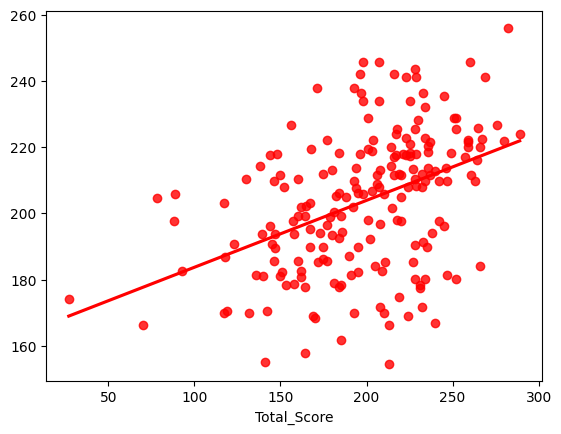

In [47]:
sns.regplot(x=y_test, y=y_pred,ci=None,color='red')

In [48]:
#Difference between Actual and Predicted Values

pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,261,211.568313,49.431687
737,192,201.842859,-9.842859
740,225,218.387815,6.612185
660,224,169.107492,54.892508
411,245,235.490388,9.509612
...,...,...,...
408,165,202.196274,-37.196274
332,171,238.052681,-67.052681
208,231,178.209770,52.790230
613,216,211.568313,4.431687
